<a href="https://colab.research.google.com/github/AatirNadim/Colab-Notebooks/blob/main/Fake_News_Detection_using_Multinomial_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('/content/fake_or_real_news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df=df.set_index('Unnamed: 0')

In [ ]:
y=df['label']
pd.DataFrame(y)

,label
Unnamed: 0,
8476,FAKE
10294,FAKE
3608,REAL
10142,FAKE
875,REAL
...,...
4490,REAL
8062,FAKE
8622,FAKE


In [ ]:
df.shape

(6335, 3)

In [ ]:
df.isna()

,title,text,label
Unnamed: 0,,,
8476,False,False,False
10294,False,False,False
3608,False,False,False
10142,False,False,False
875,False,False,False
...,...,...,...
4490,False,False,False
8062,False,False,False
8622,False,False,False


In [ ]:
x=df['text']
x

Unnamed: 0
8476     Daniel Greenfield, a Shillman Journalism Fello...
10294    Google Pinterest Digg Linkedin Reddit Stumbleu...
3608     U.S. Secretary of State John F. Kerry said Mon...
10142    — Kaydee King (@KaydeeKing) November 9, 2016 T...
875      It's primary day in New York and front-runners...
                               ...                        
4490     The State Department told the Republican Natio...
8062     The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622      Anti-Trump Protesters Are Tools of the Oligar...
4021     ADDIS ABABA, Ethiopia —President Obama convene...
4330     Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=53)
X_train.shape


(4244,)

In [ ]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [ ]:
pd.DataFrame(count_vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
0,00
1,000
2,0000
3,00000031
4,000035
...,...
56917,محاولات
56918,من
56919,هذا
56920,والمرضى


In [ ]:
pd.DataFrame(count_train)

,0
0,
1,"(0, 42470)\t1\n (0, 12105)\t1\n (0, 54177)..."
2,"(0, 16972)\t1\n (0, 762)\t1\n (0, 38140)\t..."
3,"(0, 40794)\t1\n (0, 17139)\t1\n (0, 55615)..."
4,"(0, 17139)\t1\n (0, 12424)\t1\n (0, 55013)..."
...,...
4239,"(0, 50628)\t1\n (0, 8399)\t3\n (0, 29531)\..."
4240,"(0, 51896)\t5\n (0, 42534)\t4\n (0, 29953)..."
4241,"(0, 16814)\t1\n (0, 25684)\t1\n (0, 35403)..."
4242,"(0, 51896)\t7\n (0, 35783)\t1\n (0, 42534)..."


In [ ]:
count_df=pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,001,0011,002,003,004,006,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,013,014,015,016,018,01am,02,020,022,023,024,025,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.blues):
  plt.imshow(cm, interpolation='Nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  ticks_marks=np.arange(0, len(classes))
  plt.xticks(ticks_marks, classes, rotation=45)
  plt.yticks(ticks_marks, classes)
  if(normalize):
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Non-normalized confusion matrix')
  thresh=cm.max()/2
  for i, j in itertools.product(cm.shape[0], cm.shape[1]):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i,j]>thresh else black)
    plt.tight_layout()
    plt.ylabel('True_Label')
    pt.xlabel('Predicted_Label')
  


In [ ]:
nbModel=MultinomialNB()
nbModel.fit(count_train, y_train)
y_pred=nbModel.predict(count_test)
from sklearn.metrics import accuracy_score
print('Accuracy of the model is {}'.format(accuracy_score(y_pred, y_test)*100))

Accuracy of the model is 89.3352462936394


Non-normalized confusion matrix


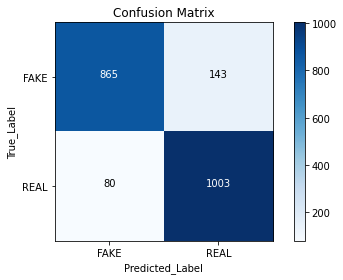

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='Nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  ticks_marks=np.arange(0, len(classes))
  plt.xticks(ticks_marks, classes, rotation=0)
  plt.yticks(ticks_marks, classes)
  if(normalize):
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Non-normalized confusion matrix')
  thresh=cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True_Label')
    plt.xlabel('Predicted_Label')
cm=confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])